Смоделировать игру против лотерейного автомата типа “777”. Игрок платит 1 руб., после чего выпадает случайное целое число, равномерно распределенное от 0 до 999. При некоторых значениях числа игрок получает выигрыш

Выгодна ли игра игроку?

Сколько в среднем приобретает или теряет игрок за одну игру?

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

вероятность выигрыша - 0.15117252931323283


,max_p,avg_p
count,1000.000000,1000.000000
mean,0.699000,0.119750
std,6.652718,0.566543
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,200.000000,15.154494


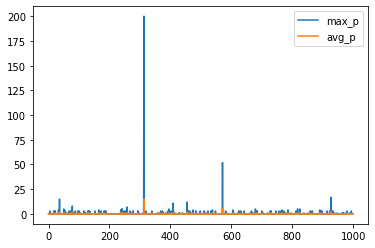

In [61]:
trials = 1000    # Количество попыток
successes_total = 0    # Количество успехов всего
max_prize = {}
total = 0


for i in range(trials):
    fee_list = []
    fee = 1
    successes = 0
    while fee > 0:
        fee -= 1
        lottery_res = np.random.randint(0, 999)
        #print(lottery_res)
        str_res = str(lottery_res)
        if lottery_res == 777:
            fee += 200
            fee_list.append(fee)
            successes += 1
        elif lottery_res == 999:
            fee += 100
            fee_list.append(fee)
            successes += 1
        elif lottery_res == 555:
            fee += 50
            fee_list.append(fee)
            successes += 1
        elif lottery_res == 333:
            fee += 15
            fee_list.append(fee)
            successes += 1
        elif lottery_res == 111:
            fee += 10
            fee_list.append(fee)
            successes += 1
        if len(str_res) == 2:
            str_res = '0' + str_res
        elif len(str_res) == 1:
            str_res = '00' + str_res
        elif str_res[-2] == "77" and lottery_res != 777:
            fee += 5
            fee_list.append(fee)
            successes += 1
        elif str_res[-1] == "7" and lottery_res != 777:
            fee += 3
            fee_list.append(fee)
            successes += 1
        elif str_res[-2] == "00":
            fee += 2
            fee_list.append(fee)
            successes += 1
        elif str_res[-1] == "0":
            fee += 1
            fee_list.append(fee)
            successes += 1
        fee_list.append(0)
    else:
        max_prize[i] = [max(fee_list), sum(fee_list) / len(fee_list)]
        successes_total += successes
        total += len(fee_list)
        #print(f'successes = {successes} max_prize = {max(fee_list)}')
        
p_monte_carlo = successes_total / total
print(f'вероятность выигрыша - {p_monte_carlo}')


df = pd.DataFrame.from_dict(max_prize , orient='index', columns=['max_p', 'avg_p'])
df.plot()

df.describe()